Re-running but with the input matrices already transposed and with fixed names

In [42]:
import scanpy as sc
import pandas as pd

In [82]:
gene_table = {
    "Columella" : ["AT1G26680", "COBL2", "AT3G55180", "NCED2", "AT5G22550", "ATL63"],
    "QC": ["RGF8", "TEL1", "DUF9", "AGL42"],
    "NC": ["PLT1", "PLT2"],
    "Endodermis" : ["PER3", "PER9", "PBL15", "TBL30", "AT2G48130", "AT3G22620"],
    "Cortex": ["AED3", "T3P18-7", "MBK21-8", "NPF6-4", "CYP71B34", "IAMT1"],
    "Atrichoblast": ["AT1G31950", "F14G6-22", "GL2", "ANL2", "PMEI4", "MUD21-4"],
    "Trichoblast" : ["EXPA7", "MES15", "ADF8", "COBL9", "TPR14"],
    "Xylem" : ["BHLH144", "MYB83", "SCPL35", "MYB46", "COBL4"],
    "VC" : ["PIN7", "PIN3"]
}

adata_shr = sc.read(
    'GSE123818_Root_single_cell_shr_datamatrix.fixednames.transposed.csv.gz')
adata_wt = sc.read(
    'GSE123818_Root_single_cell_wt_datamatrix.fixednames.transposed.csv.gz')
adata = adata_shr.concatenate(adata_wt,
                              batch_categories=["shr","wt"])
adata.var_names_make_unique()
adata.write("adata.h5ad")

Only considering the two last: ['.csv', '.gz'].
Only considering the two last: ['.csv', '.gz'].
Only considering the two last: ['.csv', '.gz'].
Only considering the two last: ['.csv', '.gz'].


In [85]:
def runUnit(sco, min_genes, min_cells, max_genes, total_counts):   
    adata = sco
    #sc.pl.highest_expr_genes(adata, n_top=20, )
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    #sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)
    #sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    adata = adata[adata.obs.n_genes_by_counts < 12000, :]
    adata = adata[adata.obs.total_counts < 120000, :]
    #sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
    adata.raw = adata
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    #sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=5, min_disp=0.2)
    #sc.pl.highly_variable_genes(adata)
    #adata = adata[:, adata.var.highly_variable]
    sc.pp.regress_out(adata, ['total_counts'])
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    #sc.pl.pca_variance_ratio(adata, log=True)
    adata.write("full.h5ad")
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(adata)
    sc.tl.leiden(adata, resolution=0.3)
    sc.pl.umap(adata, color=['leiden', 'batch'])
    sc.pl.DotPlot(adata, var_names=gene_table, groupby="leiden").show()
    return(adata)

/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


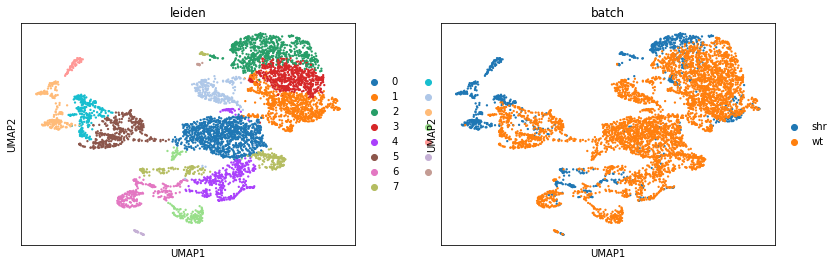

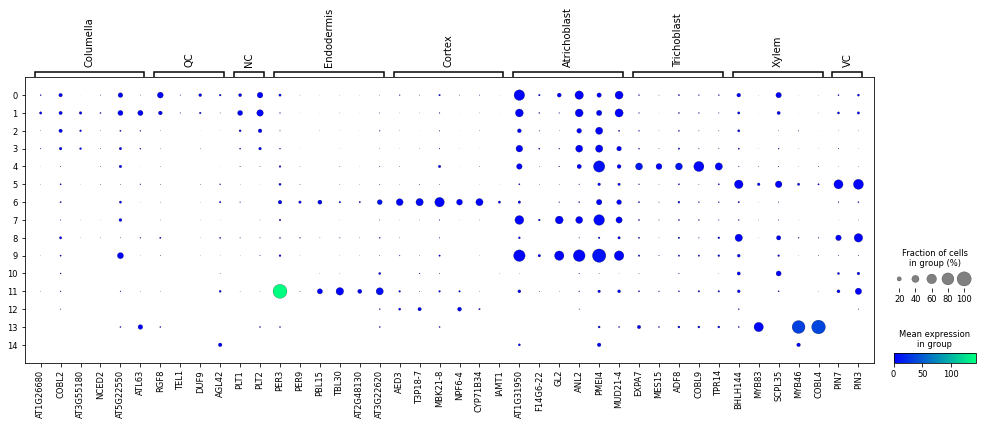

In [80]:
runUnit(adata, 200, 3, 10000, 120000)

/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


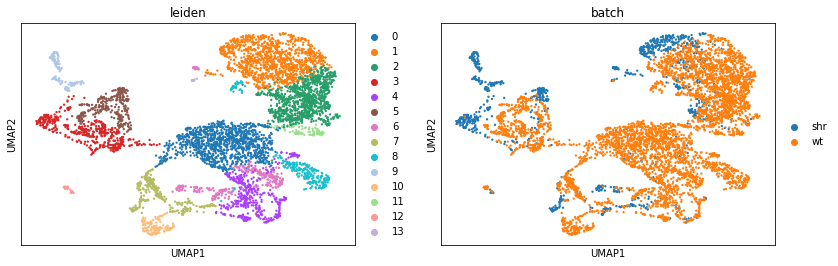

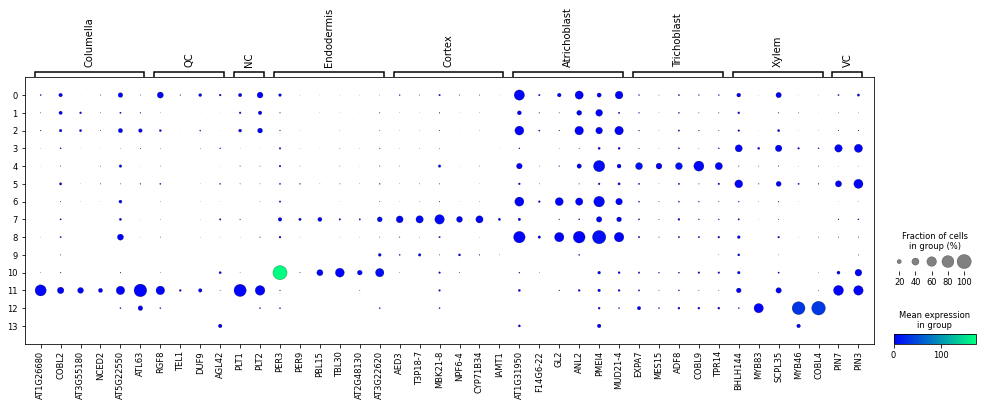

In [84]:
adata = sc.read("adata.h5ad")
runUnit(adata, 1000, 50, 10000, 100000)

/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


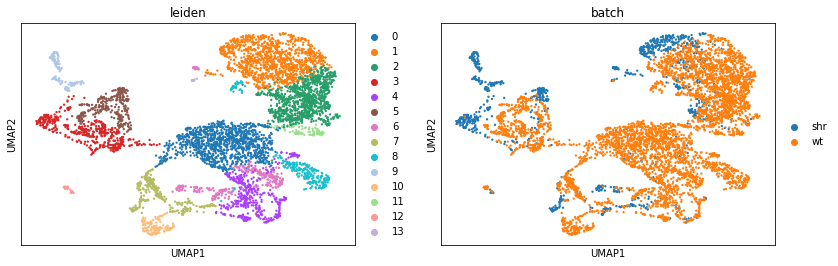

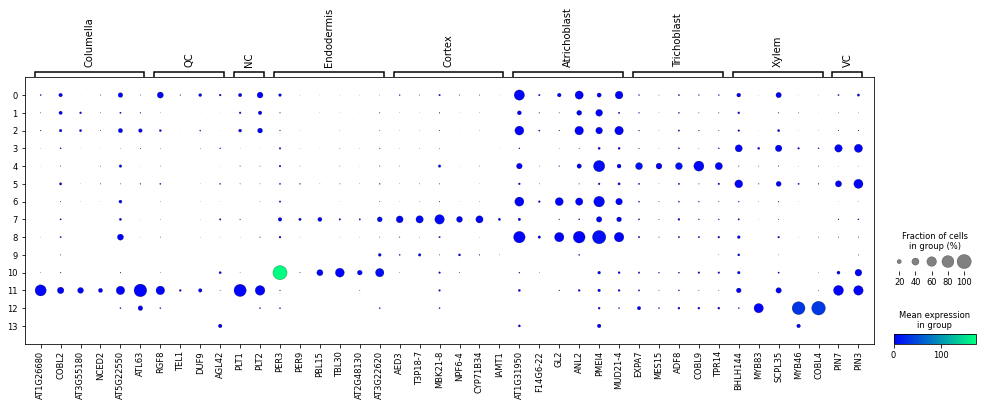

In [86]:
adata = sc.read("adata.h5ad")
adata_new = runUnit(adata, 500, 10, 10000, 100000)

In [139]:
adata_new.obs["leiden"].cat.categories = [
    '0', '1', '2', '3', 'trichoblast',
    '5', '6', 'cortex',
    '8', '9', '10', 
    'columella+QC+NC',
    'xylem', '13'
]

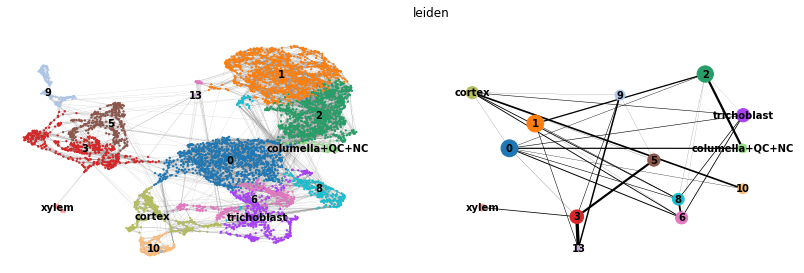

In [140]:
sc.tl.paga(adata_new)
sc.pl.paga_compare(adata_new, edges=True)
##sc.tl.dpt(adata_new)
##sc.pl.dpt_timeseries(adata_new)

/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/tetris/miniconda3/envs/plant/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


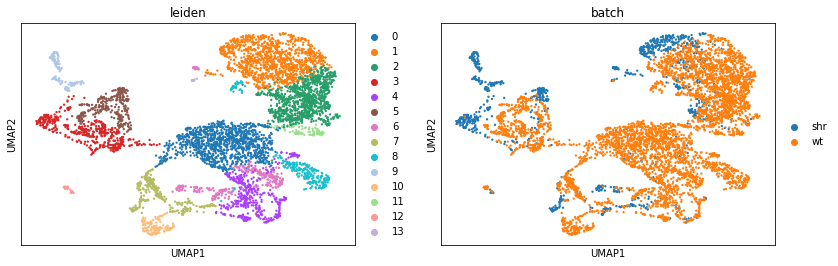

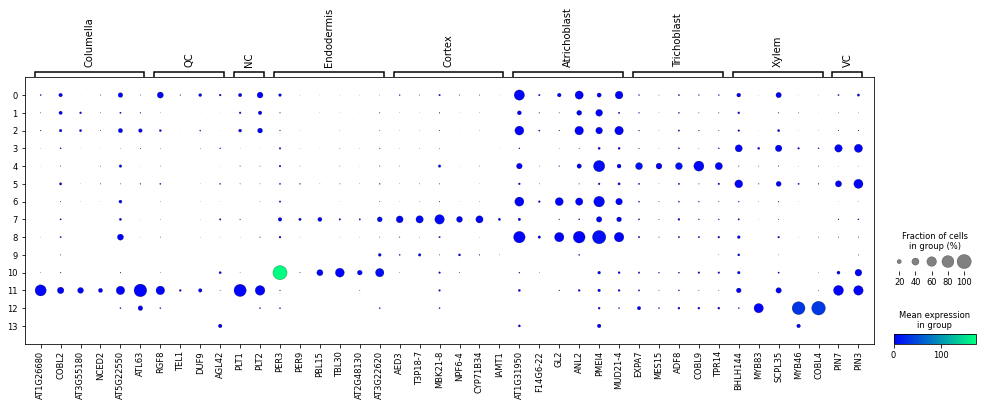

In [141]:
adata = sc.read("adata.h5ad")
adata_new = runUnit(adata, 100, 2, 20000, 200000)

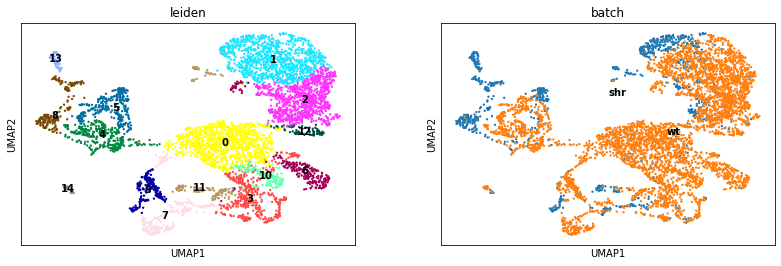

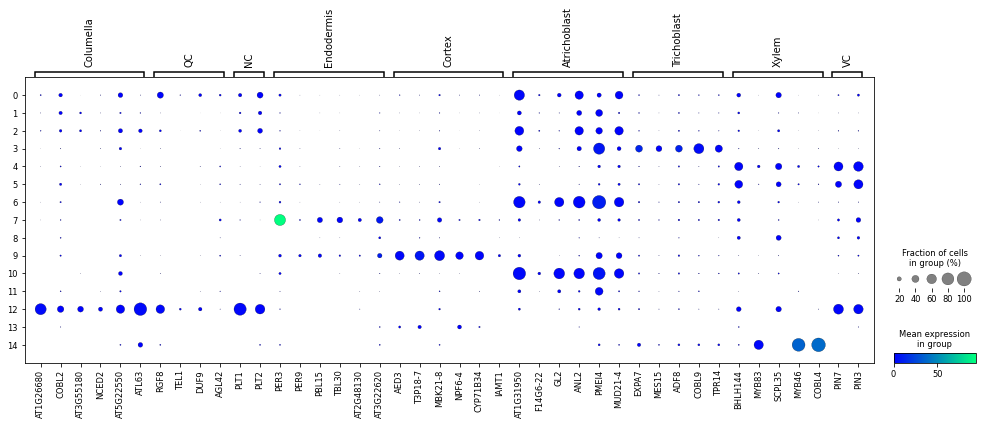

In [152]:
sc.tl.leiden(adata_new, resolution=0.35)
sc.pl.umap(adata_new, color=['leiden', 'batch'], legend_loc='on data')
sc.pl.DotPlot(adata_new, var_names=gene_table, groupby="leiden").show()